# Deep CNN and geometric features-based diseases detection and classification


In this research, a new technique is applied based on the fusion of deep convolutional (CNN) and geometric features.

### Part 1

- Initially, disease regions are extracted from given WCE images using a new approach named contrast-enhanced colour features.

- Geometric features are extracted from segmented disease region.

### Part 2

- Thereafter, unique VGG16 and VGG19 deep CNN features fusion are performed based on Euclidean Fisher Vector.

- The unique features are fused with geometric features which are later fed to conditional entropy approach for best features selection. The selected features are finally classified by K-Nearest Neighbour.

- a new technique is applied based on the fusion of deep convolutional (CNN) and geometric features.


In [9]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
# import matplotlib.image as mpimg


### Settings:

In [10]:
path = 'Resource/DataSet/WL_3.png'

kernal_size = (5, 5)
Structuring_element_shape = {
    'MORPH_RECT' : cv.MORPH_RECT,
    'MORPH_ELLIPSE': cv.MORPH_ELLIPSE,
    'MORPH_CROSS': cv.MORPH_CROSS
}

kernel = np.ones(kernal_size, np.uint8)
Structuring_element = cv.getStructuringElement(Structuring_element_shape['MORPH_ELLIPSE'], kernal_size)

In [11]:
# Rectangular Kernel
# cv.getStructuringElement(cv.MORPH_RECT, kernal_size)
# array([[1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1]], dtype=uint8)

# Elliptical Kernel
# cv.getStructuringElement(cv.MORPH_ELLIPSE, kernal_size)
# array([[0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0]], dtype=uint8)

# Cross-shaped Kernel
# cv.getStructuringElement(cv.MORPH_CROSS, kernal_size)
# array([[0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0]], dtype=uint8)

### Image selection:


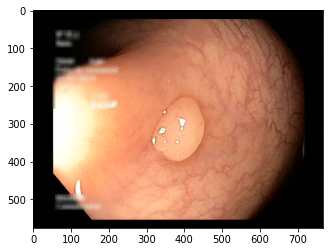

In [12]:
# Reading Image
lesion_img = cv.imread(path)
lesion_img_bgr = lesion_img.copy()
# Converting color to RGB since OpenCv use BGR, and matplotlib uses BGR
lesion_img = cv.cvtColor(lesion_img, cv.COLOR_BGR2RGB)
# showing image
imgplot = plt.imshow(lesion_img)


# Contrast-enhanced colour features (CHCF)

### Contrast elongating

Contrast elongating is performed to increase lesion contrast in the given image. It is one of the very
first steps in image processing to improve the contrast of given image. The input image is invented
and the resultant image is more suitable as related to the original image.

In contrast stretching phase, top-hat and bottom-hat filters are performed. The top-hat filter
improves the contrast of foreground regions whereas bottom-hat filter controls the background
contrast.

- Top Hat: It is the difference between input image and Opening of the image.
- Black Hat: It is the difference between the closing of the input image and input image.

In [ ]:
# The top-hat transform is an operation that extracts small elements and details from given images.

tophat_img = cv.morphologyEx(lesion_img, cv.MORPH_TOPHAT, kernel)

blackhat_img = cv.morphologyEx(tophat_img, cv.MORPH_BLACKHAT, kernel)
